In [ ]:
# Caso "Municipalidad San Vicente"
# Sesión A: Importando y Preparando Datos

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
San_Vicente = pd.read_csv('/content/respuestas_mensuales.csv', delimiter = ";")

In [3]:
San_Vicente.head()

,Mes,Solicitudes_Resueltas
0,2007-1,21
1,2007-2,20
2,2007-3,23
3,2007-4,24
4,2007-5,26


In [4]:
San_Vicente.tail()

,Mes,Solicitudes_Resueltas
175,2021-8,31
176,2021-9,28
177,2021-10,29
178,2021-11,28
179,2021-12,29


In [5]:
San_Vicente['Mes'] = pd.to_datetime(San_Vicente['Mes'])

In [6]:
San_Vicente.head()

,Mes,Solicitudes_Resueltas
0,2007-01-01,21
1,2007-02-01,20
2,2007-03-01,23
3,2007-04-01,24
4,2007-05-01,26


In [7]:
San_Vicente.set_index('Mes', inplace = True)

In [8]:
San_Vicente.index

DatetimeIndex(['2007-01-01', '2007-02-01', '2007-03-01', '2007-04-01',
               '2007-05-01', '2007-06-01', '2007-07-01', '2007-08-01',
               '2007-09-01', '2007-10-01',
               ...
               '2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01',
               '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01',
               '2021-11-01', '2021-12-01'],
              dtype='datetime64[ns]', name='Mes', length=180, freq=None)

In [9]:
San_Vicente.describe()

,Solicitudes_Resueltas
count,180.000000
mean,27.511111
std,3.823609
min,20.000000
25%,25.000000
50%,28.000000
75%,30.000000
max,36.000000


In [ ]:
# Paso 2: Grafico

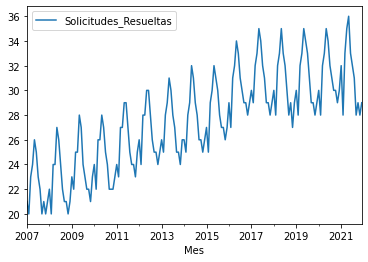

In [10]:
San_Vicente.plot()

Claramente hay un componente estacional, ¿por qué podría ser?

Se puede ver que en los últimos años se ha quedado "fija" la serie temporal

In [11]:
seriedetiempo = San_Vicente['Solicitudes_Resueltas']

In [12]:
type(seriedetiempo)

pandas.core.series.Series

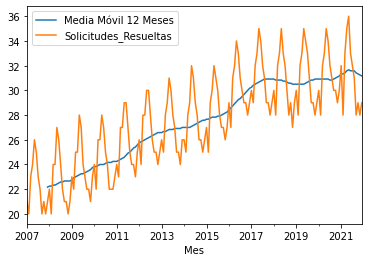

In [14]:
seriedetiempo.rolling(12).mean().plot(label = 'Media Móvil 12 Meses')
seriedetiempo.rolling(12).std().plot(label = 'Sigma 12 Meses')
seriedetiempo.plot()
plt.legend()

In [ ]:
#Paso 3: Descomposición Estacional

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

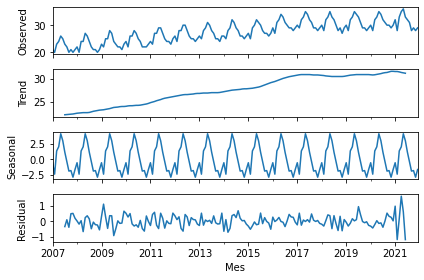

In [17]:
s_dec_additive = seasonal_decompose(seriedetiempo, model = "additive")
s_dec_additive.plot()
plt.show()

In [18]:
from statsmodels.tsa.stattools import adfuller

In [19]:
resultado = adfuller(San_Vicente['Solicitudes_Resueltas'])

In [20]:
resultado

(-1.6942289424391195,
 0.43408832551505117,
 14,
 165,
 {'1%': -3.470616369591229,
  '10%': -2.57619681359045,
  '5%': -2.8792214018977655},
 314.1181723768779)

Nuestros datos son no Estacionarios... por lo cual necesitamos una transformación

In [21]:
def prueba_adf(time_series):
    resultado = adfuller(time_series)
    print("Prueba Dicky-Fuller Aumentado")
    labels = ['Estadístico ADF', 'p-value', '# de retrasos', 'Observaciones utilizadas']
    for valor, label in zip(resultado, labels):
        print(label + ":" + str(valor))
        
    if resultado[1] <= 0.05:
        print("Se rechaza la hipótesis nula")
        print("Los datos son estacionarios")
    else:
        print("No se puede rechazar hipótesis nula")
        print("Los datos no son estacionarios")

In [22]:
prueba_adf(San_Vicente['Solicitudes_Resueltas'])

Prueba Dicky-Fuller Aumentado
Estadístico ADF:-1.6942289424391195
p-value:0.43408832551505117
# de retrasos:14
Observaciones utilizadas:165
No se puede rechazar hipótesis nula
Los datos no son estacionarios


In [ ]:
# Análisis con Diferencias

In [23]:
San_Vicente['Primera Diferencia'] = San_Vicente['Solicitudes_Resueltas'] - San_Vicente['Solicitudes_Resueltas'].shift(1)

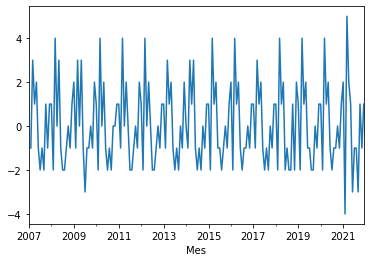

In [24]:
San_Vicente['Primera Diferencia'].plot()

In [25]:
prueba_adf(San_Vicente['Primera Diferencia'].dropna())

Prueba Dicky-Fuller Aumentado
Estadístico ADF:-2.3656782796562124
p-value:0.1516586478346995
# de retrasos:13
Observaciones utilizadas:165
No se puede rechazar hipótesis nula
Los datos no son estacionarios


In [26]:
San_Vicente['Segunda Diferencia'] = San_Vicente['Solicitudes_Resueltas'] - San_Vicente['Solicitudes_Resueltas'].shift(2)

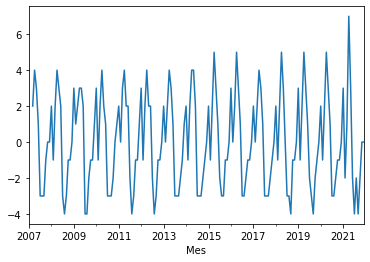

In [27]:
San_Vicente['Segunda Diferencia'].plot()

In [28]:
prueba_adf(San_Vicente['Segunda Diferencia'].dropna())

Prueba Dicky-Fuller Aumentado
Estadístico ADF:-2.833713701881656
p-value:0.05361703866063132
# de retrasos:14
Observaciones utilizadas:163
No se puede rechazar hipótesis nula
Los datos no son estacionarios


In [29]:
San_Vicente['Diferencia Estacionalidad'] = San_Vicente['Solicitudes_Resueltas'] - San_Vicente['Solicitudes_Resueltas'].shift(12)

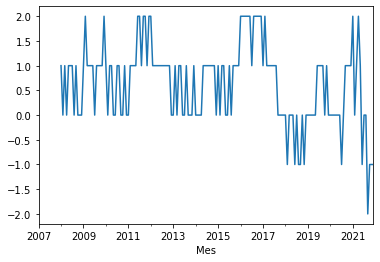

In [33]:
San_Vicente['Diferencia Estacionalidad'].plot()

In [34]:
prueba_adf(San_Vicente['Diferencia Estacionalidad'].dropna())

Prueba Dicky-Fuller Aumentado
Estadístico ADF:-1.7106153889104996
p-value:0.42565157557989836
# de retrasos:14
Observaciones utilizadas:153
No se puede rechazar hipótesis nula
Los datos no son estacionarios


In [35]:
San_Vicente['Primera Diferencia con Estacionalidad'] = San_Vicente['Primera Diferencia'] - San_Vicente['Primera Diferencia'].shift(12)

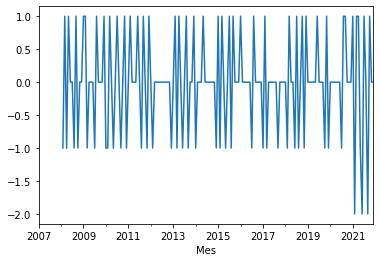

In [36]:
San_Vicente['Primera Diferencia con Estacionalidad'].plot()

In [38]:
prueba_adf(San_Vicente['Primera Diferencia con Estacionalidad'].dropna())

Prueba Dicky-Fuller Aumentado
Estadístico ADF:-5.1611780978126625
p-value:1.0546775340878642e-05
# de retrasos:13
Observaciones utilizadas:153
Se rechaza la hipótesis nula
Los datos son estacionarios


In [ ]:
# Partiendo la base

In [39]:
San_Vicente

,Solicitudes_Resueltas,Primera Diferencia,Segunda Diferencia,Diferencia Estacionalidad,Primera Diferencia con Estacionalidad
Mes,,,,,
2007-01-01,21,NaN,NaN,NaN,NaN
2007-02-01,20,-1.0,NaN,NaN,NaN
2007-03-01,23,3.0,2.0,NaN,NaN
2007-04-01,24,1.0,4.0,NaN,NaN
2007-05-01,26,2.0,3.0,NaN,NaN
...,...,...,...,...,...
2021-08-01,31,-1.0,-2.0,0.0,0.0
2021-09-01,28,-3.0,-4.0,-2.0,-2.0
2021-10-01,29,1.0,-2.0,-1.0,1.0


In [40]:
San_VicenteA = San_Vicente[0:156]

In [41]:
San_VicenteA

,Solicitudes_Resueltas,Primera Diferencia,Segunda Diferencia,Diferencia Estacionalidad,Primera Diferencia con Estacionalidad
Mes,,,,,
2007-01-01,21,NaN,NaN,NaN,NaN
2007-02-01,20,-1.0,NaN,NaN,NaN
2007-03-01,23,3.0,2.0,NaN,NaN
2007-04-01,24,1.0,4.0,NaN,NaN
2007-05-01,26,2.0,3.0,NaN,NaN
...,...,...,...,...,...
2019-08-01,31,-2.0,-3.0,1.0,0.0
2019-09-01,29,-2.0,-4.0,1.0,0.0
2019-10-01,29,0.0,-2.0,0.0,-1.0


In [42]:
San_VicenteB = San_Vicente[156:179]

In [44]:
San_VicenteB

,Solicitudes_Resueltas,Primera Diferencia,Segunda Diferencia,Diferencia Estacionalidad,Primera Diferencia con Estacionalidad
Mes,,,,,
2020-01-01,30,1.0,2.0,0.0,0.0
2020-02-01,28,-2.0,-1.0,0.0,0.0
2020-03-01,32,4.0,2.0,0.0,0.0
2020-04-01,33,1.0,5.0,0.0,0.0
2020-05-01,35,2.0,3.0,0.0,0.0
2020-06-01,34,-1.0,1.0,0.0,0.0
2020-07-01,32,-2.0,-3.0,-1.0,-1.0
2020-08-01,31,-1.0,-3.0,0.0,1.0
2020-09-01,30,-1.0,-2.0,1.0,1.0


In [ ]:
# Gráficos ACF y PACF

In [45]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

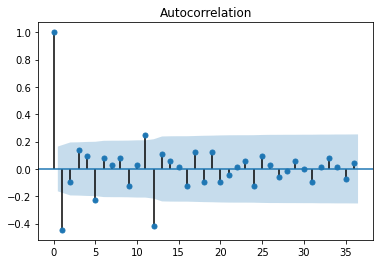

In [46]:
grafico1 = plot_acf(San_VicenteA['Primera Diferencia con Estacionalidad'].dropna(), lags = 36)

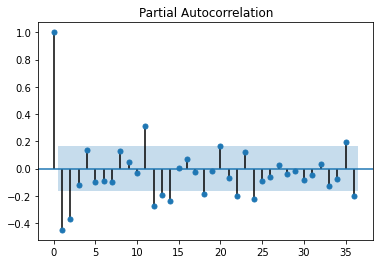

In [47]:
grafico2 = plot_pacf(San_VicenteA['Primera Diferencia con Estacionalidad'].dropna(), lags = 36)

In [48]:
# Modelo ARIMA

In [49]:
from statsmodels.tsa.arima_model import ARIMA

In [58]:
modelo = sm.tsa.statespace.SARIMAX(San_VicenteA['Solicitudes_Resueltas'], order = (2,1,2), seasonal_order = (1,1,1,24))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [59]:
resultados = modelo.fit()

In [60]:
print(resultados.summary())
# P = 3 AIC 198
# P = 1 AIC 195
# P = 2 AIC 196

                                 Statespace Model Results                                 
Dep. Variable:              Solicitudes_Resueltas   No. Observations:                  156
Model:             SARIMAX(2, 1, 2)x(3, 1, 1, 24)   Log Likelihood                 -90.372
Date:                            Wed, 29 Jun 2022   AIC                            198.744
Time:                                    01:02:06   BIC                            224.621
Sample:                                01-01-2007   HQIC                           209.259
                                     - 12-01-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3203      0.228     -1.406      0.160      -0.767       0.126
ar.L2         -0.5569      0.114   

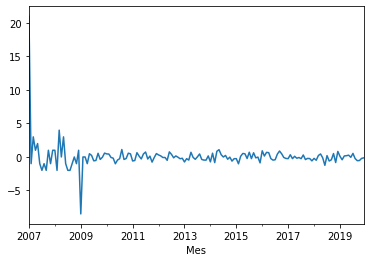

In [61]:
resultados.resid.plot()

In [62]:
# Pronostico con ARIMA

In [63]:
San_VicenteA['pronostico'] = resultados.predict()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
San_VicenteA

,Solicitudes_Resueltas,Primera Diferencia,Segunda Diferencia,Diferencia Estacionalidad,Primera Diferencia con Estacionalidad,pronostico
Mes,,,,,,
2007-01-01,21,NaN,NaN,NaN,NaN,0.000000
2007-02-01,20,-1.0,NaN,NaN,NaN,20.999998
2007-03-01,23,3.0,2.0,NaN,NaN,19.999999
2007-04-01,24,1.0,4.0,NaN,NaN,23.000001
2007-05-01,26,2.0,3.0,NaN,NaN,24.000000
...,...,...,...,...,...,...
2019-08-01,31,-2.0,-3.0,1.0,0.0,31.236226
2019-09-01,29,-2.0,-4.0,1.0,0.0,29.556819
2019-10-01,29,0.0,-2.0,0.0,-1.0,29.532377


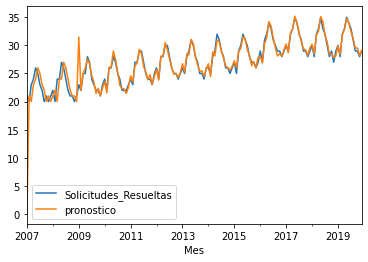

In [65]:
San_VicenteA[['Solicitudes_Resueltas', 'pronostico']].plot()

In [ ]:
# Agregar filas con fechas futuras

In [66]:
from pandas.tseries.offsets import DateOffset

In [67]:
fechasfuturas = [San_VicenteA.index[-1] + DateOffset(months = x) for x in range(1,25)]

In [ ]:
fechasfuturas

[Timestamp('2020-01-01 00:00:00'),
 Timestamp('2020-02-01 00:00:00'),
 Timestamp('2020-03-01 00:00:00'),
 Timestamp('2020-04-01 00:00:00'),
 Timestamp('2020-05-01 00:00:00'),
 Timestamp('2020-06-01 00:00:00'),
 Timestamp('2020-07-01 00:00:00'),
 Timestamp('2020-08-01 00:00:00'),
 Timestamp('2020-09-01 00:00:00'),
 Timestamp('2020-10-01 00:00:00'),
 Timestamp('2020-11-01 00:00:00'),
 Timestamp('2020-12-01 00:00:00'),
 Timestamp('2021-01-01 00:00:00'),
 Timestamp('2021-02-01 00:00:00'),
 Timestamp('2021-03-01 00:00:00'),
 Timestamp('2021-04-01 00:00:00'),
 Timestamp('2021-05-01 00:00:00'),
 Timestamp('2021-06-01 00:00:00'),
 Timestamp('2021-07-01 00:00:00'),
 Timestamp('2021-08-01 00:00:00'),
 Timestamp('2021-09-01 00:00:00'),
 Timestamp('2021-10-01 00:00:00'),
 Timestamp('2021-11-01 00:00:00'),
 Timestamp('2021-12-01 00:00:00')]

In [68]:
df_futura = pd.DataFrame(index=fechasfuturas, columns = San_VicenteA.columns)

In [69]:
df_futura

,Solicitudes_Resueltas,Primera Diferencia,Segunda Diferencia,Diferencia Estacionalidad,Primera Diferencia con Estacionalidad,pronostico
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-01,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-01,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-01,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-01,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-01,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-01,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-01,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
nuevoSan_VicenteA = pd.concat([San_VicenteA, df_futura])

In [71]:
nuevoSan_VicenteA

,Solicitudes_Resueltas,Primera Diferencia,Segunda Diferencia,Diferencia Estacionalidad,Primera Diferencia con Estacionalidad,pronostico
2007-01-01,21,NaN,NaN,NaN,NaN,0.000000
2007-02-01,20,-1.0,NaN,NaN,NaN,20.999998
2007-03-01,23,3.0,2.0,NaN,NaN,19.999999
2007-04-01,24,1.0,4.0,NaN,NaN,23.000001
2007-05-01,26,2.0,3.0,NaN,NaN,24.000000
...,...,...,...,...,...,...
2021-08-01,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-01,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-01,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
nuevoSan_VicenteA['pronostico'] = resultados.predict(start = 156, end = 179)

In [73]:
nuevoSan_VicenteA

,Solicitudes_Resueltas,Primera Diferencia,Segunda Diferencia,Diferencia Estacionalidad,Primera Diferencia con Estacionalidad,pronostico
2007-01-01,21,NaN,NaN,NaN,NaN,NaN
2007-02-01,20,-1.0,NaN,NaN,NaN,NaN
2007-03-01,23,3.0,2.0,NaN,NaN,NaN
2007-04-01,24,1.0,4.0,NaN,NaN,NaN
2007-05-01,26,2.0,3.0,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-08-01,NaN,NaN,NaN,NaN,NaN,31.771816
2021-09-01,NaN,NaN,NaN,NaN,NaN,29.937959
2021-10-01,NaN,NaN,NaN,NaN,NaN,29.956780
2021-11-01,NaN,NaN,NaN,NaN,NaN,28.956999


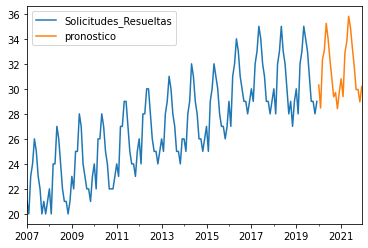

In [74]:
nuevoSan_VicenteA[['Solicitudes_Resueltas', 'pronostico']].plot()

In [75]:
nuevoSan_VicenteA['pronostico'][156:179]

2020-01-01    30.303740
2020-02-01    28.468370
2020-03-01    32.345738
2020-04-01    33.080446
2020-05-01    35.232280
2020-06-01    34.018671
2020-07-01    32.341911
2020-08-01    30.834744
2020-09-01    29.357490
2020-10-01    29.698764
2020-11-01    28.414140
2020-12-01    29.763980
2021-01-01    30.805851
2021-02-01    29.383803
2021-03-01    32.863637
2021-04-01    33.772369
2021-05-01    35.804088
2021-06-01    34.863871
2021-07-01    33.251170
2021-08-01    31.771816
2021-09-01    29.937959
2021-10-01    29.956780
2021-11-01    28.956999
Name: pronostico, dtype: float64

In [ ]:
# Validación del Modelo: Cálculo del RMSE

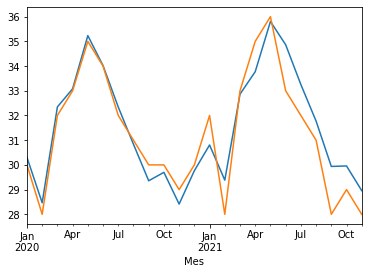

In [77]:
nuevoSan_VicenteA['pronostico'][156:179].plot()
San_VicenteB['Solicitudes_Resueltas'].plot()

In [78]:
from sklearn.metrics import mean_squared_error

In [79]:
rmse = np.sqrt(mean_squared_error(San_VicenteB['Solicitudes_Resueltas'], nuevoSan_VicenteA['pronostico'][156:179]))

In [80]:
rmse

0.876398420261982

In [ ]:
# Más RMSE
# order = (2,1,2), seasonal_order = (3,1,1,24):
# order = (2,1,2), seasonal_order = (1,1,1,24): 
# order = (2,1,2), seasonal_order = (2,1,1,24):